Credit:
1. https://towardsdatascience.com/a-star-a-search-algorithm-eb495fb156bb
2. https://gist.github.com/ryancollingwood/32446307e976a11a1185a5394d6657bc
3. https://medium.com/@nicholas.w.swift/easy-a-star-pathfinding-7e6689c7f7b2
4. https://www.pythonpool.com/a-star-algorithm-python/
5. https://www.geeksforgeeks.org/a-search-algorithm/

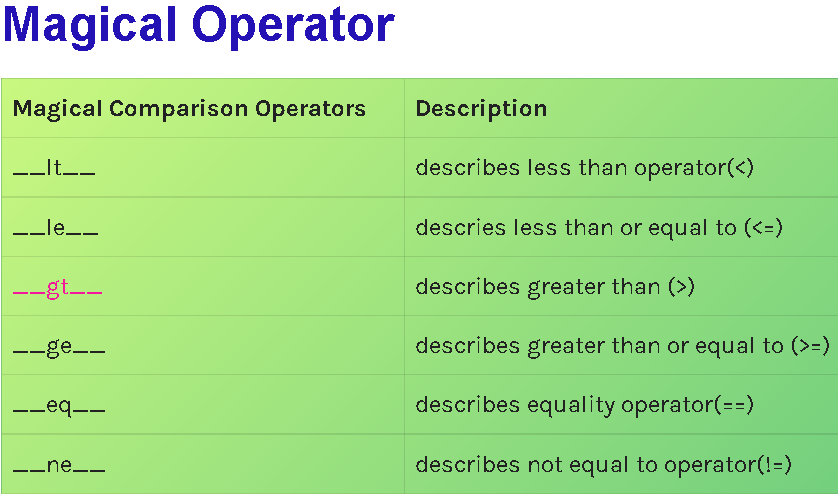

# F = G + H
**F** is the total cost of the node. <br>
**G** is the distance between the current node and the start node. <br>
**H**is the heuristic — estimated distance from the current node to the end node. <br>

In [7]:
# Credit for this: Nicholas Swift
# as found at https://medium.com/@nicholas.w.swift/easy-a-star-pathfinding-7e6689c7f7b2
from warnings import warn
import heapq

class Node:
    """
    A node class for A* Pathfinding
    """

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0 # The actual cost path from the start node to the current node. 
        self.h = 0 # The actual cost path from the current node to goal node.
        self.f = 0 # The actual cost path from the start node to the goal node.

    def __eq__(self, other):
        return self.position == other.position 
        # return True, if both is exact match else False
    
    # https://www.journaldev.com/22460/python-str-repr-functions
    # __repr__ function is supposed to return an “official” string representation 
    # of the object, which can be used to construct the object again.
    def __repr__(self):
      return f"{self.position} - g: {self.g} h: {self.h} f: {self.f}"

    # https://www.pythonpool.com/python-__lt__/#:~:text=__lt__%20is%20a,to%20define%20operators%20in%20python.
    # https://www.tutorialspoint.com/How-to-implement-Python-lt-gt-custom-overloaded-operators
    # defining less than for purposes of heap queue
    def __lt__(self, other):  
      return self.f < other.f
      # return True, if 'self.f' is less than 'other.f' else False
    
    # defining greater than for purposes of heap queue
    def __gt__(self, other):
      return self.f > other.f
      # return True, if 'self.f' is greater than 'other.f' else False

def return_path(current_node):
    path = []
    current = current_node
    while current is not None:
        path.append(current.position)
        current = current.parent
    return path[::-1]  # Return reversed path


def astar(maze, start, end, allow_diagonal_movement = False):
    """
    Returns a list of tuples as a path from the given start to the given end in the given maze
    :param maze:
    :param start:
    :param end:
    :return:
    """

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Heapify the open_list and Add the start node
    heapq.heapify(open_list) 
    heapq.heappush(open_list, start_node)

    # Adding a stop condition
    outer_iterations = 0
    max_iterations = (len(maze[0]) * len(maze) // 2)

    # what squares do we search
    adjacent_squares = ((0, -1), (0, 1), (-1, 0), (1, 0),)
    if allow_diagonal_movement:
        adjacent_squares = ((0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1),)

    # Loop until you find the end
    while len(open_list) > 0:
        outer_iterations += 1

        if outer_iterations > max_iterations:
          # if we hit this point return the path such as it is
          # it will not contain the destination
          warn("giving up on pathfinding too many iterations")
          return return_path(current_node)       
        
        # Get the current node
        current_node = heapq.heappop(open_list)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            return return_path(current_node)

        # Generate children
        children = []
        
        for new_position in adjacent_squares: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:
            # Child is on the closed list
            if len([closed_child for closed_child in closed_list if closed_child == child]) > 0:
                continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            if len([open_node for open_node in open_list if child.position == open_node.position and child.g > open_node.g]) > 0:
                continue

            # Add the child to the open list
            heapq.heappush(open_list, child)

    warn("Couldn't get a path to destination")
    return None

def example(print_maze = True):

    maze = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,] * 2,
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,] * 2,
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,] * 2,
            [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,] * 2,
            [0,0,0,1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,] * 2,
            [0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,] * 2,
            [0,0,0,1,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,] * 2,
            [0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,] * 2,
            [0,0,0,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,] * 2,
            [0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,0,1,0,1,1,] * 2,
            [0,0,0,1,0,1,0,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,0,1,0,1,0,0,0,] * 2,
            [0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,] * 2,
            [0,0,0,1,0,1,1,1,1,0,1,0,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,0,] * 2,
            [0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,] * 2,
            [0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,] * 2,
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,] * 2,]
    
    start = (0, 0)
    end = (len(maze)-1, len(maze[0])-1)

    path = astar(maze, start, end)

    if print_maze:
      for step in path:
        maze[step[0]][step[1]] = 2
      
      for row in maze:
        line = []
        for col in row:
          if col == 1:
            line.append("\u2588")
          elif col == 0:
            line.append(" ")
          elif col == 2:
            line.append(".")
        print("".join(line))

    print(path)

example()

..............█                             █               
             .█                             █               
         .....█                             █               
      ....█████          ............   █████          ...  
   ██ .████   █          .█      ██ .████   █          .█.  
   █...█ .....█    .......█ █    █...█ .....█    .......█.█ 
   █.████.██ .███ ..███████      █.████.██ .███ ..███████...
   █.█   ..█ ...██.█      ███    █.█   ..█ ...██.█      ███.
   █.██ ██.███ ....█  █████      █.██ ██.███ ....█  █████...
   █.█   ..  ███████    █ █ ██   █.█   ..  ███████    █ █.██
   █.█ ██.████  ███████ █ █      █.█ ██.████  ███████ █ █...
   █.█   .█         █   █ ███    █.█   .█         █   █ ███.
   █.████.█  ███ ████ ███ █      █.████.█  ███ ████ ███ █...
   █....█.     █          █ ██   █....█.     █          █.██
   █   ...  █     █       █      █   ...  █     █       █...
█████████████████████████████ █████████████████████████████.
[(0, 0), (0, 1), (0, 2),

# Basic concepts of A*
Where

**g  (n) :** The actual cost path from the start node to the current node. 

**h ( n) :** The actual cost path from the current node to goal node.

**f  (n) :** The actual cost path from the start node to the goal node.
<br>
<br>
For the implementation of A* algorithm we have to use two arrays namely OPEN and CLOSE.
<br>
## OPEN:
An array that contains the nodes that have been generated but have not been yet examined till yet.

## CLOSE:
An array which contains the nodes which are examined.
# Algorithm
1. Firstly, Place the starting node into OPEN and find its f (n) value.
2. Then remove the node from OPEN, having the smallest f (n) value. If it is a goal node, then stop and return to success.
3. Else remove the node from OPEN, and find all its successors.
4. Find the f (n) value of all the successors, place them into OPEN, and place the removed node into CLOSE.
5. Goto Step-2.
6. Exit.

# Advantages of A* Algorithm in Python
It is fully complete and optimal.
This is the best one of all the other techniques. We use to solve all the complex problems through this algorithm.
The algorithm is optimally efficient, i.e., there is no other optimal algorithm that is guaranteed to expand fewer nodes than A*.
# Disadvantages of A* Algorithm in Python
This algorithm is complete if the branching factor is finite of the algorithm and every action has a fixed cost.
The speed execution of A* search is highly dependant on the accuracy of the heuristic algorithm that is used to compute h (n) and is a bit slower than other algorithms.
It is having complex problems.

In [8]:
from collections import deque
 
class Graph:
    def __init__(self, adjac_lis):
        self.adjac_lis = adjac_lis
 
    def get_neighbors(self, v):
        return self.adjac_lis[v]
 
    # This is heuristic function which is having equal values for all nodes
    def h(self, n):
        H = {
            'A': 1,
            'B': 1,
            'C': 1,
            'D': 1
        }
 
        return H[n]
 
    def a_star_algorithm(self, start, stop):
        # In this open_lst is a lisy of nodes which have been visited, but who's 
        # neighbours haven't all been always inspected, It starts off with the start 
  #node
        # And closed_lst is a list of nodes which have been visited
        # and who's neighbors have been always inspected
        open_lst = set([start])
        closed_lst = set([])
 
        # poo has present distances from start to all other nodes
        # the default value is +infinity
        poo = {}
        poo[start] = 0
 
        # par contains an adjac mapping of all nodes
        par = {}
        par[start] = start
 
        while len(open_lst) > 0:
            n = None
 
            # it will find a node with the lowest value of f() -
            for v in open_lst:
                if n == None or poo[v] + self.h(v) < poo[n] + self.h(n):
                    n = v;
 
            if n == None:
                print('Path does not exist!')
                return None
 
            # if the current node is the stop
            # then we start again from start
            if n == stop:
                reconst_path = []
 
                while par[n] != n:
                    reconst_path.append(n)
                    n = par[n]
 
                reconst_path.append(start)
 
                reconst_path.reverse()
 
                print('Path found: {}'.format(reconst_path))
                return reconst_path
 
            # for all the neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
              # if the current node is not presentin both open_lst and closed_lst
                # add it to open_lst and note n as it's par
                if m not in open_lst and m not in closed_lst:
                    open_lst.add(m)
                    par[m] = n
                    poo[m] = poo[n] + weight
 
                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update par data and poo data
                # and if the node was in the closed_lst, move it to open_lst
                else:
                    if poo[m] > poo[n] + weight:
                        poo[m] = poo[n] + weight
                        par[m] = n
 
                        if m in closed_lst:
                            closed_lst.remove(m)
                            open_lst.add(m)
 
            # remove n from the open_lst, and add it to closed_lst
            # because all of his neighbors were inspected
            open_lst.remove(n)
            closed_lst.add(n)
 
        print('Path does not exist!')
        return None

# Input

In [9]:
adjac_lis = {
    'A': [('B', 1), ('C', 3), ('D', 7)],
    'B': [('D', 5)],
    'C': [('D', 12)]
}
graph1 = Graph(adjac_lis)
graph1.a_star_algorithm('A', 'D')

Path found: ['A', 'B', 'D']


['A', 'B', 'D']

In [10]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)


def main():

    maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

    start = (0, 0)
    end = (7, 6)

    path = astar(maze, start, end)
    print(path)


if __name__ == '__main__':
    main()

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 4), (6, 5), (7, 6)]


In [11]:
class box():
    """A box class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given board"""

    # Create start and end node
    start_node = box(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = box(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)
    
    print(*open_list)
    #print(lambda i: (for i in open_list))
    for i in range(len(open_list)):
      print("open_list".ljust(25," "), open_list[i])
    print("len(open_list)".ljust(25," "), len(open_list))

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = box(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)


def main():

    board = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]

    start = (0, 0)
    end = (6, 6)

    path = astar(board, start, end)
    print(path)


if __name__ == '__main__':
    main()

open_list                 <__main__.box object at 0x7f4cc3750990>
len(open_list)            1
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 4), (6, 5), (6, 6)]


# A-Star (A*) Search Algorithm
Credit: https://towardsdatascience.com/a-star-a-search-algorithm-eb495fb156bb

**Class ‘Node’** that can be used to create an object for every node with information as the **parent node, current position** in the maze, and **cost** values (**g, h & f**).
<br>
<br>
First, we will create a **class** for a **node** that will contain all the 
attributes associated with the node like:- 
<br>
**parent of the node,** 
<br>
**position of the node,** and 
<br>
**all three costs (g,h & f)** for the node. 

We initialize the node and build a method for checking the **equality** of the node with another node.

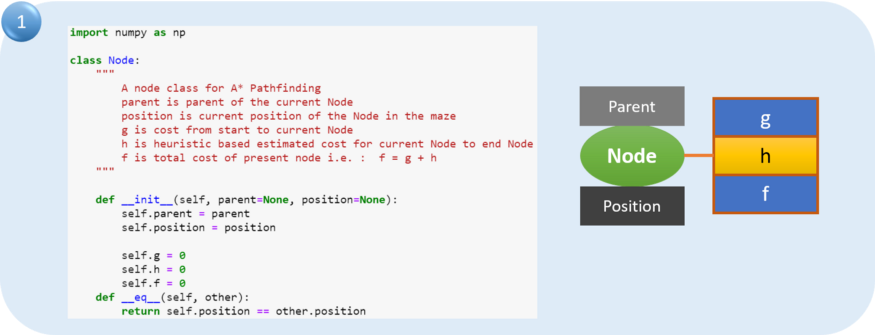

Now we will build the **path function**, which will be used to return the path from the **start node** to the **target node (end node)**.

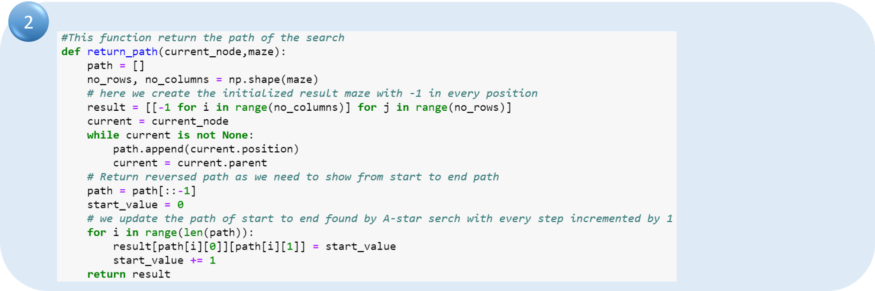

Now we will define the **search function**, which has multiple steps. The first step will be to **initialize nodes and lists** that we will use in the function.

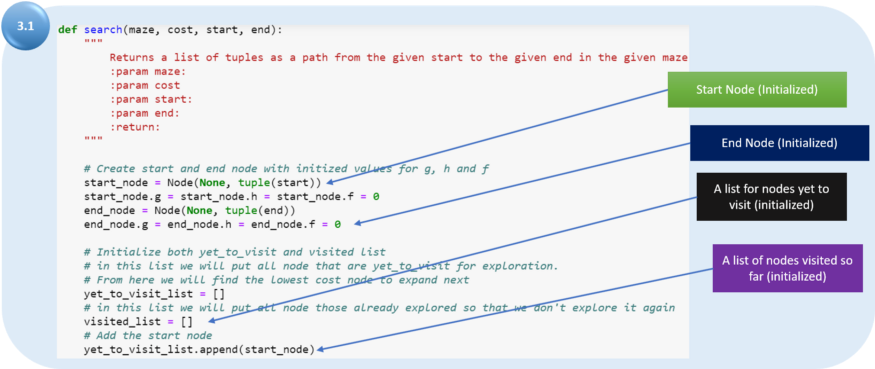

Add the starting node to the “yet to visit list.” Define a stop condition to avoid an infinite loop. Define movement in terms of relative position, which will be used to find the child node and other relative positions.

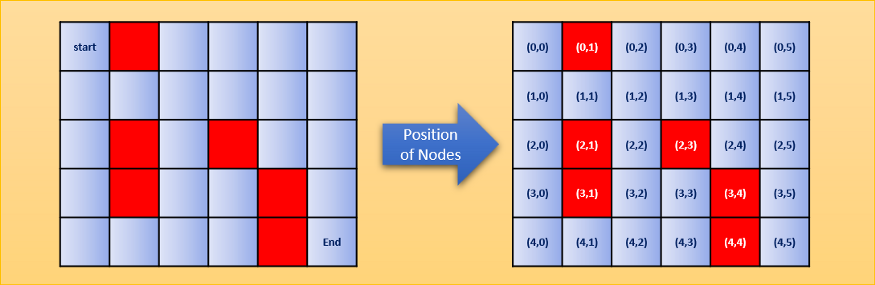

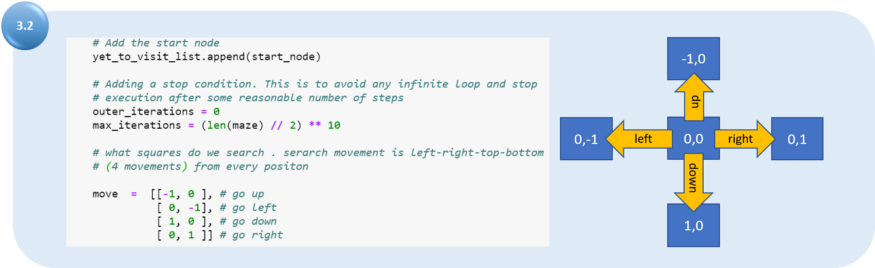

Now we use the current node by comparing all **f cost** and selecting the lowest cost node for further expansion. We also check **max iteration** reached or not, Set a message and stop execution (avoid infinite loop)

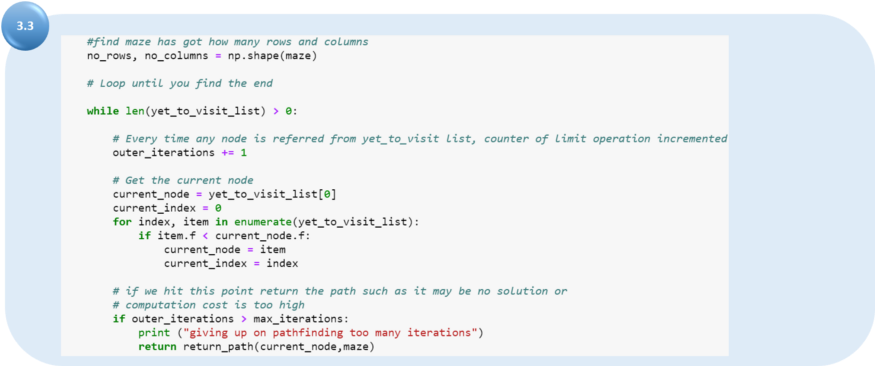

Remove the selected node from “yet to visit list” and add this node to the visited list. Now we put a check if we found the target square. If we have located the target square, then call the path function and return.

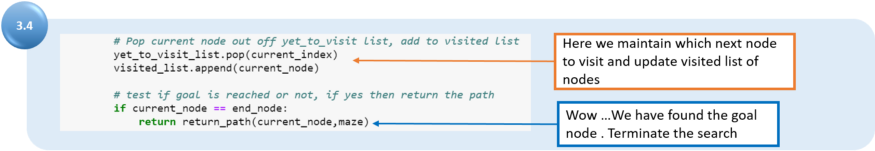

For the selected node, find out all children (use the move to find children). Get the current position for the selected node (this becomes the parent node for the children)
<br>
<br>
a) check if a valid location exists (boundary wall will make few nodes invalid)
<br>
b) if any node position is invalid (red square) then ignore that
<br>
c) add to valid children node list for the selected parent
<br>
<br>
Here in the diagram, we show the black circle node is the current node, and green circle nodes are correct children node.

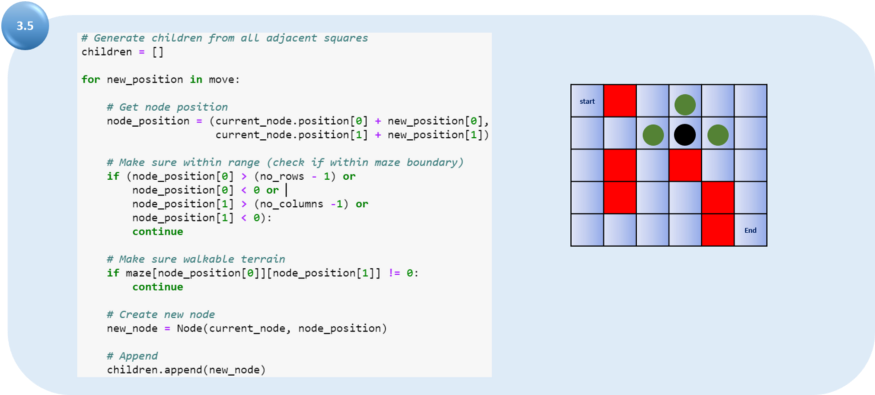

For all child node:
<br>
a) if the child is in the visited list, then ignore it and try the next child node.
<br>
b) calculate child node g, h, and f values. For h heuristic for the cost to reach the goal node for the current node is calculated here using euclidean distance.
<br>
c) if the child in “yet to visit list” then ignore it else, move the child to “yet to visit list.”

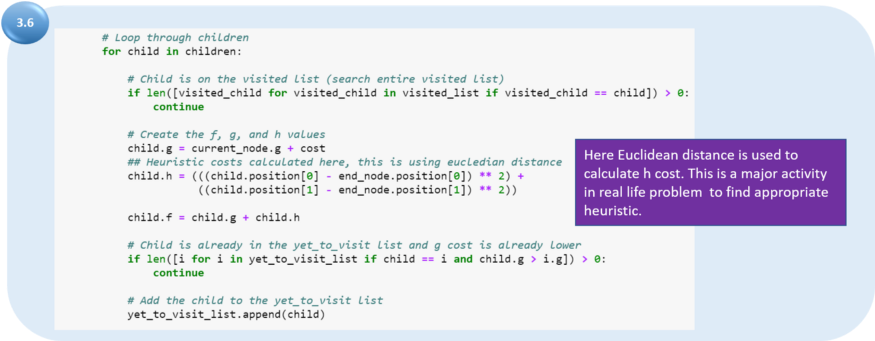

Now finally, we will run the program from the main with the maze and obtain the path. Refer to the path also shown using the arrow.

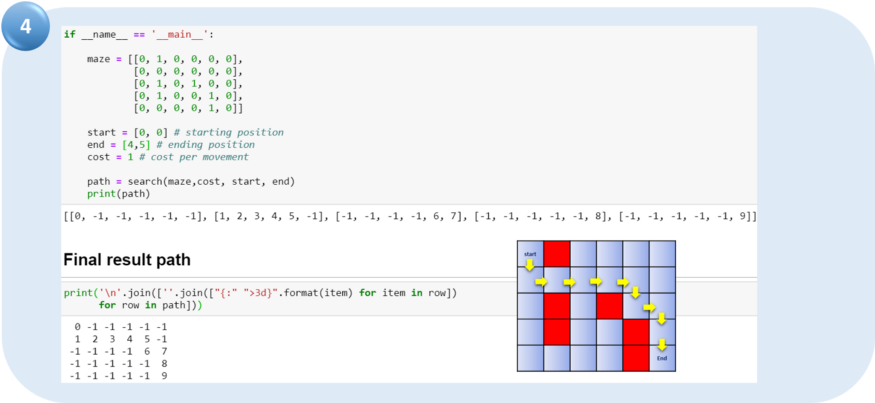

Conclusion
A-star (A*) is a mighty algorithm in Artificial Intelligence with a wide range of usage. However, it is only as good as its heuristic function( which can be highly variable considering the nature of a problem). A* is the most popular choice for pathfinding because it’s reasonably flexible.
It has found applications in many software systems, from Machine Learning and search Optimization to game development where characters navigate through complex terrain and obstacles to reach the player.
You can find full code in [this GitHub](https://https://github.com/BaijayantaRoy/Medium-Article/blob/master/A_Star.ipynb) repository.

In [12]:
import numpy as np

class Node:
    """
        A node class for A* Pathfinding
        parent is parent of the current Node
        position is current position of the Node in the maze
        g is cost from start to current Node
        h is heuristic based estimated cost for current Node to end Node
        f is total cost of present node i.e. :  f = g + h
    """

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0
    def __eq__(self, other):
        return self.position == other.position

#This function return the path of the search
def return_path(current_node,maze):
    path = []
    no_rows, no_columns = np.shape(maze)
    # here we create the initialized result maze with -1 in every position
    result = [[-1 for i in range(no_columns)] for j in range(no_rows)]
    current = current_node
    while current is not None:
        path.append(current.position)
        current = current.parent
    # Return reversed path as we need to show from start to end path
    path = path[::-1]
    start_value = 0
    # we update the path of start to end found by A-star serch with every step incremented by 1
    for i in range(len(path)):
        result[path[i][0]][path[i][1]] = start_value
        start_value += 1
    return result


def search(maze, cost, start, end):
    """
        Returns a list of tuples as a path from the given start to the given end in the given maze
        :param maze:
        :param cost
        :param start:
        :param end:
        :return:
    """

    # Create start and end node with initized values for g, h and f
    start_node = Node(None, tuple(start))
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, tuple(end))
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both yet_to_visit and visited list
    # in this list we will put all node that are yet_to_visit for exploration. 
    # From here we will find the lowest cost node to expand next
    yet_to_visit_list = []  
    # in this list we will put all node those already explored so that we don't explore it again
    visited_list = [] 
    
    # Add the start node
    yet_to_visit_list.append(start_node)
    
    # Adding a stop condition. This is to avoid any infinite loop and stop 
    # execution after some reasonable number of steps
    outer_iterations = 0
    max_iterations = (len(maze) // 2) ** 10

    # what squares do we search . serarch movement is left-right-top-bottom 
    #(4 movements) from every positon

    move  =  [[-1, 0 ], # go up
              [ 0, -1], # go left
              [ 1, 0 ], # go down
              [ 0, 1 ]] # go right


    """
        1) We first get the current node by comparing all f cost and selecting the lowest cost node for further expansion
        2) Check max iteration reached or not . Set a message and stop execution
        3) Remove the selected node from yet_to_visit list and add this node to visited list
        4) Perofmr Goal test and return the path else perform below steps
        5) For selected node find out all children (use move to find children)
            a) get the current postion for the selected node (this becomes parent node for the children)
            b) check if a valid position exist (boundary will make few nodes invalid)
            c) if any node is a wall then ignore that
            d) add to valid children node list for the selected parent
            
            For all the children node
                a) if child in visited list then ignore it and try next node
                b) calculate child node g, h and f values
                c) if child in yet_to_visit list then ignore it
                d) else move the child to yet_to_visit list
    """
    #find maze has got how many rows and columns 
    no_rows, no_columns = np.shape(maze)
    
    # Loop until you find the end
    
    while len(yet_to_visit_list) > 0:
        
        # Every time any node is referred from yet_to_visit list, counter of limit operation incremented
        outer_iterations += 1    

        
        # Get the current node
        current_node = yet_to_visit_list[0]
        current_index = 0
        for index, item in enumerate(yet_to_visit_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
                
        # if we hit this point return the path such as it may be no solution or 
        # computation cost is too high
        if outer_iterations > max_iterations:
            print ("giving up on pathfinding too many iterations")
            return return_path(current_node,maze)

        # Pop current node out off yet_to_visit list, add to visited list
        yet_to_visit_list.pop(current_index)
        visited_list.append(current_node)

        # test if goal is reached or not, if yes then return the path
        if current_node == end_node:
            return return_path(current_node,maze)

        # Generate children from all adjacent squares
        children = []

        for new_position in move: 

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range (check if within maze boundary)
            if (node_position[0] > (no_rows - 1) or 
                node_position[0] < 0 or 
                node_position[1] > (no_columns -1) or 
                node_position[1] < 0):
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:
            
            # Child is on the visited list (search entire visited list)
            if len([visited_child for visited_child in visited_list if visited_child == child]) > 0:
                continue

            # Create the f, g, and h values
            child.g = current_node.g + cost
            ## Heuristic costs calculated here, this is using eucledian distance
            child.h = (((child.position[0] - end_node.position[0]) ** 2) + 
                       ((child.position[1] - end_node.position[1]) ** 2)) 

            child.f = child.g + child.h

            # Child is already in the yet_to_visit list and g cost is already lower
            if len([i for i in yet_to_visit_list if child == i and child.g > i.g]) > 0:
                continue

            # Add the child to the yet_to_visit list
            yet_to_visit_list.append(child)


if __name__ == '__main__':

    maze = [[0, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 1, 0, 1, 0, 0],
            [0, 1, 0, 0, 1, 0],
            [0, 0, 0, 0, 1, 0]]
    
    start = [0, 0] # starting position
    end = [4,5] # ending position
    cost = 1 # cost per movement

    path = search(maze,cost, start, end)
    print(path)

[[0, -1, -1, -1, -1, -1], [1, 2, 3, 4, 5, -1], [-1, -1, -1, -1, 6, 7], [-1, -1, -1, -1, -1, 8], [-1, -1, -1, -1, -1, 9]]


## Final result path

In [13]:
print('\n'.join([''.join(["{:" ">3d}".format(item) for item in row]) 
      for row in path]))

  0 -1 -1 -1 -1 -1
  1  2  3  4  5 -1
 -1 -1 -1 -1  6  7
 -1 -1 -1 -1 -1  8
 -1 -1 -1 -1 -1  9
